### Class 1
This week's classroom instruction will focus on three things:
- **Part 1**: Getting the integration between UCloud and GitHub to work
- **Part 2**: Learning how to setup a virtual environment for Python
- **Part 3**: A few warm-up exercises on string manipulation

#### Part 1: Integration between UCloud and GitHub
First, follow the instructions provided in `ucloud.md`.

Once you have done that, let's look at how to use the repository with course materials. First, log in to https://github.com and go to the repository's link: https://github.com/rbroc/NLP-AU-23. 

##### Forking the repository
Click on `Fork` (top-right of the page). This creates a copy of the repository which is partly independent of the original repository. You will be submitting changes to *this* repository. 
The original repository will be iteratively updated with new materials or exercises. You can sync the two by setting them both as *remotes* in your local instance of the repository. 

##### Cloning the repository and setting up remotes
With the VS Code app on UCloud open, and a Terminal open, you can clone your repository by `cd`-ing into your private folder, and running: 
```
git clone https://github.com/your_username/NLP-AU-23
```

You can visualize your remotes by typing: `git remote -v`.
You should add my repository as a remote, by running:
```
git remote add [robertas_remote_name] https://github.com/rbroc/NLP-AU-23.git
```

##### Our workflow
As my repository gets updated, you can pull it into yours by running:
```
git pull [robertas_remote_name]
```

You can push to your remote by typing:
```
git push origin [branch_name]
```

Once you have done this, our workflow will be the following:
- You run the github setup script (and log in with your token if needed)
- You go to your local repo
- You pull my repo
- You make changes and push to your fork

#### Part 2: Virtual environments
A good way to manage dependencies for specific projects and avoid conflicts is to create virtual environments (which contain bundles of libraries that you can "activate" and "deactivate" at will, without those interfering with your global environment). I tend to keep my virtual environments in the same place, e.g., my private folder on UCloud.

##### Creating, activating, and deactivating a virtual environment
Let's create a virtual enviroment.
1. Navigate to your private folder (`path_to_folder`)
2. Create a virtual environment folder, e.g., by running `mkdir venvs`
3. Create a new virtual environment (`nlp-e23`), by running:
`python -m venv path_to_folder/venvs/nlp-e23`
4. You can activate it by running: `source path_to_folder/nlp-e23/bin/activate`
5. To deactivate it, you can simply run: `deactivate`
Anything you `pip install` while the enviroment is active stays inside the environment. 
To make sure you have the latest pip, run:
```
pip install --upgrade pip
```
The nice thing about this is that you don't need to reinstall stuff whenever you open UCloud, just load your virtual environment.

##### Using it in a notebook
Everything you install which the virtual environment is active is fully contained inside the virtual environments.
If you virtual environment is active, scripts will use it, but an extra step is needed to use it as part of notebooks.
First, we need to install ipykernel:
```
pip install ipykernel
```

Then, we need to create a new kernel using our virtual environment:
```
python3 -m ipykernel install --user --name=nlp-e23
```

Now try to open a notebook (you can create an empty one by running `touch notebook_name.ipynb`). On the top right, you can choose a kernel. A kernel based on the virtual environment will be available.

##### Installing libraries from a requirements file
An easy way to keep track of your dependencies is to add them to a requirements file. They are generally called something like `requirements.txt`, and they are simply a list of libraries your project needs.
The content of the text file looks something like this:
```
datasets==2.12.0
pandas==1.5.3
```
You will have one library per line, and -- although it is not obligatory -- you can pin the package to the version you know is needed for your project.
You can install all the dependencies needed from your requirements file, by running:

`pip install -r requirements.txt`


#### Part 3: Warm-up exercises
What follows is a few exercises to get back in shape with Python syntax, especially for what concerns simple string manipulation.

#### String concatenation
Write a function that takes two strings as input, and returns a concatenated string (the second string is appended to the end of the first one).

In [2]:
def concat_two_strings(string1, string2):
    '''Concatenate two strings and return the result.'''
    concatenated_string = string1 + string2
    return concatenated_string

In [5]:
concat_two_strings("hey you ", "sexy bitch")

'hey you sexy bitch'

Now write a function that can take any number of strings, and concatenate all of them. Hint: you can use a different data structure to pass the strings (e.g., an iterable), or use `*args` to pass any number of arguments to the function call.

In [7]:

def concat_strings(*args):
    '''Concatenate any number of strings and return the result.
    *args is used to accept any number of positional 
    arguments, which are then joined together using 
    the join method. This will concatenate all 
    the input strings into a single string.
    '''
    concatenated_string = ''.join(args)
    return concatenated_string

In [8]:
result = concat_strings("Hello, ", "world!", " How", " are", " you?")
print(result)  # Output will be "Hello, world! How are you?"


Hello, world! How are you?


#### Counting substrings
Write a function that takes two inputs: 
- l, which is a single character;
- s, which is a string. 

The function should return how many times l is contained in s (an integer).

In [12]:
def letter_count(l, s):
    ''' Add code '''
    count = 0
    for i in s:
        if l==i:
            count +=1 # increment value of count add the value on the right side of the += operator to the variable on the left side and then assign the result back to the variable on the left side
    return count

In [13]:
count = letter_count("i","ibi bibbi pippi was a hippie")
print(count)

8


Can you make a function that generalizes to l being any sequence of characters (e.g., counting how many times the substring `ab` occurs)? 
Hint: you can do it in base python, or use functions (e.g., `findall`) from the regex package `re`.

In [17]:
import re

def count_substring(substring, string):
    '''Count the number of times the substring appears in the string.'''
    # Use re.findall to find all occurrences of the substring in the string
    occurrences = re.findall(substring, string)
    return len(occurrences)


In [16]:
result = count_substring('ab', 'abababab you where a badabababab')
print(result)  # Output will be 8 because 'ab' appears 8 times in 'badabababab'.


8


Now edit the previous function to be able to return counts for multiple strings (make *l* an iterable, e.g., a list).
The output should be a dictionary with keys *k* and values *v*, such that k are all elements of *l*, and *v* is the respective count.

In [19]:
import re

def count_substrings(substrings_to_count, strings_to_search_in):
    '''
    Count the number of times each substring appears in the list of strings.
    
    Args:
    substrings (iterable): A collection/list of substrings to count.
    strings (iterable): A collection/list of strings to search for substrings in.

    Returns:
    dict: A dictionary where keys are substrings and values are their respective counts.
    '''
    # Initialize an empty dictionary to store counts for each substring
    counts = {}

    # Loop through each substring and each string
    for substring in substrings_to_count:
        # Initialize the count for the current substring to 0
        counts[substring] = 0
        
        for string in strings_to_search_in:
            # Use re.findall to find all occurrences of the substring in the string
            occurrences = re.findall(substring, string)
            # Update the count for the current substring
            counts[substring] += len(occurrences)

    return counts

# Example usage:
substrings_to_count = ["cogsci", "brain", "love"]
strings_to_search_in = ["cogsci is more fun than psychology", "cogsci people love fun", "let's get our brain fucked up"]
result = count_substrings(substrings_to_count, strings_to_search_in)
print(result)


{'cogsci': 2, 'brain': 1, 'love': 1}


#### Loading text files

Loading a text file: the `data` folder contains a file called `book-war-and-peace.txt`.
Use the functions `open` and `read` to read the file as a single string, and split it into a list of words, based on the presence of whitespaces.
Once you have done this, try to use the function `readlines` instead: what does it do?

In [27]:
data_path = '/work/EmmaRisgaardOlsen#9993/NLP-AU/data/book-war-and-peace.txt'

try: # works if file exists 
    with open(data_path, 'r') as file:
        # Read the entire file as a single string
        text = file.read()
        # Split the text into a list of words based on whitespaces
        words = text.split()
except FileNotFoundError:
    print(f"File not found: {file_path}")

print(words)

In [31]:
# using readlines instead - we now read the file line by line and store each line as an element in a list! line breaks are separate list
try: # if file exists
    with open(data_path, 'r') as file:
        # Read the file line by line and store each line as an element in a list
        lines = file.readlines()
except FileNotFoundError:
    print(f"File not found: {file_path}")


# print(lines)

#### Regular expressions

After reading the file with `read`, replace all newlines (`\n`) with whitespaces first, remove any sequences of multiple whitespaces, and then all alphanumeric characters (excluding spaces). Hint: you can use functions like `re.sub` to do so (here is a guide to regex patterns: https://docs.python.org/3/howto/regex.html).

In [33]:
# Remove \n and non-alphanumeric characters
import re
data_path = '/work/EmmaRisgaardOlsen#9993/NLP-AU/data/book-war-and-peace.txt'

try:
    with open(data_path, 'r') as file:
        # Read the entire file as a single string
        text = file.read()

        # Replace newlines with whitespaces
        text = re.sub(r'\n', ' ', text)

        # Remove sequences of multiple whitespaces and replace with a single space
        text = re.sub(r'\s+', ' ', text)

        # Remove all alphanumeric characters (excluding spaces)
        text = re.sub(r'[^A-Za-z0-9\s]', '', text)

        # Split the text into a list of words based on whitespaces
        words = text.split()

except FileNotFoundError:
    print(f"File not found: {data_path}")

# Print the resulting list of words
#print(words)


Now lowercase this text, split by whitespace, and count the number of occurrences for each word. 
Hint: 
- import `Counter` (`from collections import Counter`) to extract counts;
- transform the output of Counter into a dictionary (pass its output to `dict`)
- import pandas as pass that to `pd.DataFrame.from_dict` (set `orient=index`)
- Sort it using `sort_values`.


Visualize the top 100 words: what do you notice?
**Answer: that the most common words are the stop words**.

In [34]:
from collections import Counter
import pandas as pd

# Load the text and perform preprocessing as described in the previous response
data_path = '/work/EmmaRisgaardOlsen#9993/NLP-AU/data/book-war-and-peace.txt'

try:
    with open(data_path, 'r') as file:
        # Read the entire file as a single string
        text = file.read()

        # Replace newlines with whitespaces
        text = re.sub(r'\n', ' ', text)

        # Remove sequences of multiple whitespaces and replace with a single space
        text = re.sub(r'\s+', ' ', text)

        # Remove all alphanumeric characters (excluding spaces)
        text = re.sub(r'[^A-Za-z0-9\s]', '', text)

        # Convert the text to lowercase
        text = text.lower()

        # Split the text into a list of words based on whitespaces
        words = text.split()

except FileNotFoundError:
    print(f"File not found: {data_path}")

# Count the occurrences of each word using Counter
word_counts = Counter(words)

# Convert the Counter object to a dictionary
word_counts_dict = dict(word_counts)

# Convert the dictionary to a DataFrame using pandas
df = pd.DataFrame.from_dict(word_counts_dict, orient='index', columns=['Count'])

# Sort the DataFrame by count values in descending order
df = df.sort_values(by='Count', ascending=False)

# Visualize the top 100 words
top_100_words = df.head(100)
print(top_100_words)

        Count
the     34395
and     22082
to      16636
of      14872
a       10464
...       ...
moscow    708
again     703
has       701
down      690
came      681

[100 rows x 1 columns]


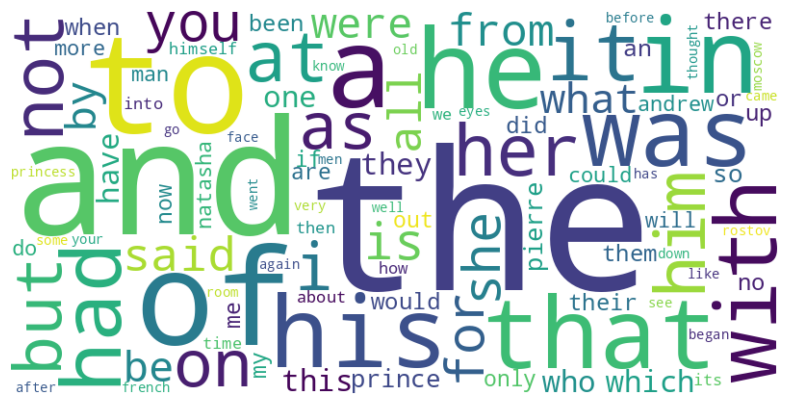

In [36]:
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the text and perform preprocessing as described in the previous response
data_path = '/work/EmmaRisgaardOlsen#9993/NLP-AU/data/book-war-and-peace.txt'

try:
    with open(data_path, 'r') as file:
        # Read the entire file as a single string
        text = file.read()

        # Replace newlines with whitespaces
        text = re.sub(r'\n', ' ', text)

        # Remove sequences of multiple whitespaces and replace with a single space
        text = re.sub(r'\s+', ' ', text)

        # Remove all alphanumeric characters (excluding spaces)
        text = re.sub(r'[^A-Za-z0-9\s]', '', text)

        # Convert the text to lowercase
        text = text.lower()

        # Split the text into a list of words based on whitespaces
        words = text.split()

except FileNotFoundError:
    print(f"File not found: {data_path}")

# Count the occurrences of each word using Counter
word_counts = Counter(words)

# Convert the Counter object to a dictionary
word_counts_dict = dict(word_counts)

# Convert the dictionary to a DataFrame using pandas
df = pd.DataFrame.from_dict(word_counts_dict, orient='index', columns=['Count'])

# Sort the DataFrame by count values in descending order
df = df.sort_values(by='Count', ascending=False)

# Get the top 100 words
top_100_words = df.head(100)

# Generate a word cloud from the top 100 words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_words['Count'])

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### 